In [39]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from data_analysis_utils import summarise_datasets, do_ttest, collate_results

figsize = (12, 6)

# Load in calibration results from .csv files

In [40]:
calib_data = {}

path = './results'
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]

for csv in csv_files:
    file = os.path.join(path, csv)
    data_name = csv.split('.')[0]
    calib_data[data_name] = pd.read_csv(file, index_col = 0)

# Calibration and evaluation on same datasets

## Summary statistics

,Reproj.,Recon.,Tracked Reproj.,Tracked Recon.,Mean Frame Grab Time,Mean Calibration Time
charuco_rig,0.944777,1.363656,1.073905,1.365135,1.309425,15.517809
dots_rig,1.204787,0.921150,1.353985,0.928704,0.942623,9.795939
charuco_freehand,1.450244,1.893063,3.654756,3.055658,1.322061,30.057087
dots_freehand,1.835267,2.779876,3.173015,2.857304,1.033029,30.133889


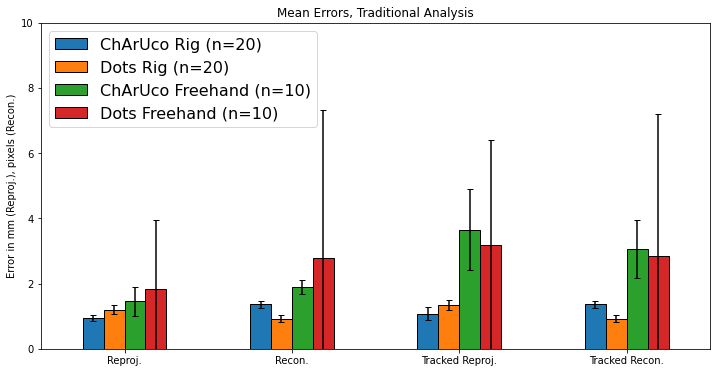

In [41]:
means, stds = summarise_datasets(calib_data, ["charuco_rig", "dots_rig", "charuco_freehand", "dots_freehand"])
columns_to_plot = ["Reproj.", "Recon.", "Tracked Reproj.", "Tracked Recon."]

labels = ["Reproj.", "Recon.", "Tracked Reproj.", "Tracked Recon."]

fig1 = plt.figure(figsize=(figsize))
ax1 = fig1.add_subplot(1, 1, 1)

means[columns_to_plot].transpose().plot.bar(title="Mean Errors, Traditional Analysis",
                                            ax=ax1,
                                            yerr=stds.transpose(),
                                            ecolor='black',
                                            capsize=3,
                                            rot=0,
                                            legend=None,
                                            ylabel="Error in mm (Reproj.), pixels (Recon.)",
                                           edgecolor=["black"])
ax1.set_ylim(0, 10)

n_charuco_rig = len(calib_data["charuco_rig"])
n_dots_rig = len(calib_data["dots_rig"])
n_charuco_freehand = len(calib_data["charuco_freehand"])
n_dots_freehand = len(calib_data["dots_freehand"])

L = ax1.legend(prop={'size': 16})
legend = [f"ChArUco Rig (n={n_charuco_rig})", f"Dots Rig (n={n_dots_rig})", f"ChArUco Freehand (n={n_charuco_freehand})", f"Dots Freehand (n={n_dots_freehand})"]
L.get_texts()[0].set_text(legend[0])
L.get_texts()[1].set_text(legend[1])
L.get_texts()[2].set_text(legend[2])
L.get_texts()[3].set_text(legend[3])

plt.savefig('plots/charuco_vs_dots_vs_freehand_mean.png', dpi=600)

means

## Freehand vs Rig ttest

In [60]:
t_test_vals = do_ttest(calib_data, "dots_freehand", "dots_rig")

Reprojection p-value: 0.3699948550565948
Reconstruction p-value: 0.22789576879181278
Tracked Reprojection p-value: 0.109252069018247
Tracked Reconstruction p-value: 0.19389779304394966


## Charuco vs Dots ttest

In [58]:
t_test_vals = do_ttest(calib_data, "charuco_rig", "dots_rig")

Reprojection p-value: 9.27435542486081e-09
Reconstruction p-value: 2.3345561731264645e-15
Tracked Reprojection p-value: 1.676298816770034e-05
Tracked Reconstruction p-value: 4.615780069561303e-15


# Calibrate on one data set, evaluate on the remaining ones
'Standard' approaches to calibration involve calbirating and evaluating on the same datasets, which will return favourable results, when compared to evaluating on a different set of data.

Instead iterate through all datasets and use 1 for calibration, and then evaluate on the rest.

This will results in n sets of results, where n is the total number of calibration data sets collected.

In [44]:
dots_folder = 'results/precalib/dots_rig'
charuco_folder = 'results/precalib/charuco_rig'
charuco_freehand_folder = 'results/precalib/charuco_freehand'
dots_freehand_folder = 'results/precalib/dots_freehand'

precalib_data = {}
threshold = 1000

precalib_data["dots_rig"] = collate_results(dots_folder, threshold=threshold)
precalib_data["charuco_rig"] = collate_results(charuco_folder, threshold=threshold)
precalib_data["charuco_freehand"] = collate_results(charuco_freehand_folder, threshold=threshold)
precalib_data["dots_freehand"] = collate_results(dots_freehand_folder, threshold=threshold)



Processing results/precalib/dots_rig
Processing results/precalib/charuco_rig
Processing results/precalib/charuco_freehand
Processing results/precalib/dots_freehand


## Summary Statistics

ValueError: The lengths of the data (4) and the error 16 do not match

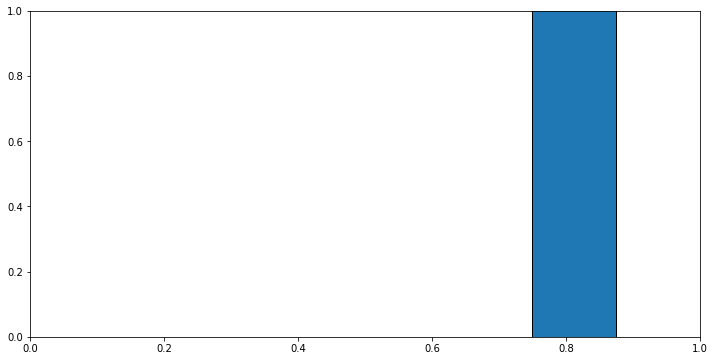

In [84]:
precalib_means, precalib_stds = summarise_datasets(precalib_data, ["charuco_rig", "dots_rig", "charuco_freehand", "dots_freehand"])

columns_to_plot = ["Reproj.", "Recon.", "Tracked Reproj.", "Tracked Recon."]

labels = ["Reproj.", "Recon.", "Tracked Reproj.", "Tracked Recon."]

fig1 = plt.figure(figsize=(figsize))
ax1 = fig1.add_subplot(1, 1, 1)

precalib_means[columns_to_plot].transpose().plot.bar(title="Mean Errors, Precalibration Analysis",
                                                     ax=ax1,
                                                     yerr=precalib_stds[columns_to_plot].transpose(),
                                                     ecolor='black',
                                                     capsize=3,
                                                     rot=0,
                                                     legend=None,
                                                     ylabel="Error in mm (Reproj.), pixels (Recon.)",
                                                    edgecolor=["black"])
ax1.set_ylim(0, 15)

n_charuco_rig = len(precalib_data["charuco_rig"])
n_dots_rig = len(precalib_data["dots_rig"])
n_charuco_freehand = len(precalib_data["charuco_freehand"])
n_dots_freehand = len(precalib_data["dots_freehand"])

L = ax1.legend(prop={'size': 16}, loc='upper left')
legend = [f"ChArUco Rig (n={n_charuco_rig})", f"Dots Rig (n={n_dots_rig})", f"ChArUco Freehand (n={n_charuco_freehand})", f"Dots Freehand (n={n_dots_freehand})"]
L.get_texts()[0].set_text(legend[0])
L.get_texts()[1].set_text(legend[1])
L.get_texts()[2].set_text(legend[2])
L.get_texts()[3].set_text(legend[3])


plt.savefig('plots/_precalib_charuco_vs_dots_vs_freehand_mean.png', dpi=600)

print("Mean Values")
precalib_means

In [82]:
precalib_stds[columns_to_plot].transpose()

,charuco_rig,dots_rig,charuco_freehand,dots_freehand
Reproj.,0.080783,0.246308,0.400772,2.536428
Recon.,0.182799,0.385266,0.896559,15.192824
Tracked Reproj.,0.200603,0.263655,1.104587,26.641453
Tracked Recon.,0.183055,0.383688,1.074102,20.302250


## Freehand vs rig ttest

In [65]:
t_test_vals = do_ttest(precalib_data, "dots_rig", "dots_freehand")

Reprojection p-value: 2.4187550412562098e-08
Reconstruction p-value: 5.990202186324267e-07
Tracked Reprojection p-value: 0.011318034440737507
Tracked Reconstruction p-value: 1.2997869108924375e-06


## Charuco vs dots ttest

In [66]:
t_test_vals = do_ttest(precalib_data, "dots_rig", "charuco_rig")

Reprojection p-value: 3.0038369534827313e-134
Reconstruction p-value: 3.2979547347330485e-14
Tracked Reprojection p-value: 1.0057491373328632e-124
Tracked Reconstruction p-value: 1.6336409127974474e-13


## Compare errors from the two analysis  methods

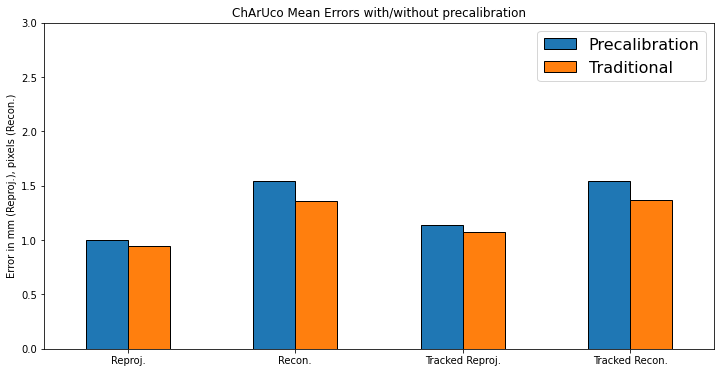

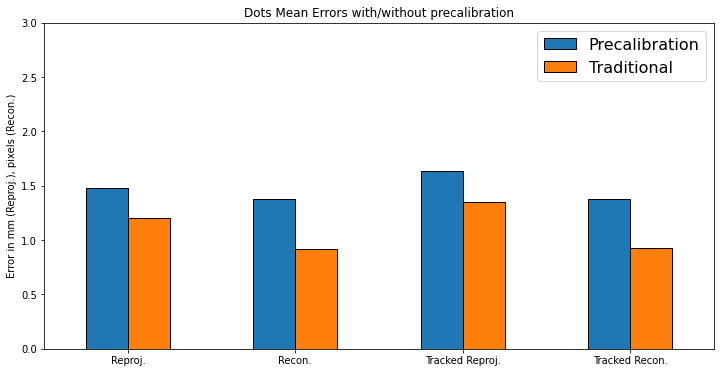

In [48]:
columns_to_plot = ["Reproj.", "Recon.", "Tracked Reproj.", "Tracked Recon."]
labels = ["Reproj.", "Recon.", "Tracked Reproj.", "Tracked Recon."]

charuco = pd.DataFrame()
dots = pd.DataFrame()

# Move the data into a format that can be plotted as desired
charuco["With_precalib"] = precalib_means.transpose()["charuco_rig"]
charuco["Without_precalib"] = means.transpose()["charuco_rig"]
dots["With_precalib"] = precalib_means.transpose()["dots_rig"]
dots["Without_precalib"] = means.transpose()["dots_rig"]

charuco = charuco.transpose()
dots = dots.transpose()

# Plot Charuco
fig1 = plt.figure(figsize=(figsize))
ax1 = fig1.add_subplot(1, 1, 1)

charuco[columns_to_plot].transpose().plot.bar(title="ChArUco Mean Errors with/without precalibration",
                                                        ax=ax1,
                                                        legend=None,
                                                        ylabel="Error in mm (Reproj.), pixels (Recon.)",
                                                        rot=0,
                                                         edgecolor=["black"])
ax1.set_ylim(0, 3)

L = ax1.legend(prop={'size': 16})
legend = [f"Precalibration", f"Traditional"]
L.get_texts()[0].set_text(legend[0])
L.get_texts()[1].set_text(legend[1])

plt.savefig('plots/charuco_precalib_vs_no_precalib.png', dpi=600)

# Plot dots
fig1 = plt.figure(figsize=(figsize))
ax1 = fig1.add_subplot(1, 1, 1)

dots[columns_to_plot].transpose().plot.bar(title="Dots Mean Errors with/without precalibration",
                                                        ax=ax1,
                                                        legend=None,
                                                       rot=0,
                                                        ylabel="Error in mm (Reproj.), pixels (Recon.)",
                                                      edgecolor=["black"])
ax1.set_ylim(0, 3)

L = ax1.legend(prop={'size': 16})
legend = [f"Precalibration", f"Traditional"]
L.get_texts()[0].set_text(legend[0])
L.get_texts()[1].set_text(legend[1])

plt.savefig('plots/Dots_precalib_vs_no_precalib.png', dpi=600)